<a href="https://colab.research.google.com/github/NAizdabezt/sgu_data_analysit/blob/main/DA06_BostonRegression_TuNhatAnh_3122410012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DỰ ĐOÁN GIÁ NHÀ (HOUSING / BOSTON DATASET)

**Mục tiêu:**

- Xây dựng các mô hình hồi quy để dự đoán giá nhà trung bình (MEDV) dựa trên các đặc trưng mô tả khu vực dân cư.

## I. GIỚI THIỆU DỮ LIỆU

Bộ dữ liệu “Boston Housing” có 506 dòng và 13 đặc trưng đầu vào + 1 nhãn đầu ra (MEDV):
| Tên cột  | Ý nghĩa                                                           |
| -------- | ----------------------------------------------------------------- |
| CRIM     | Tỷ lệ tội phạm bình quân đầu người                                |
| ZN       | Tỷ lệ đất ở trên 25.000 ft²                                       |
| INDUS    | Tỷ lệ diện tích đất phi thương mại                                |
| CHAS     | Giáp sông Charles (1 = Có, 0 = Không)                             |
| NOX      | Nồng độ khí NO (ô nhiễm không khí)                                |
| RM       | Số lượng phòng trung bình mỗi nhà                                 |
| AGE      | Tỷ lệ nhà xây trước 1940 (%)                                      |
| DIS      | Khoảng cách đến trung tâm việc làm                                |
| RAD      | Chỉ số tiếp cận đường cao tốc                                     |
| TAX      | Thuế bất động sản (USD / 10.000)                                  |
| PTRATIO  | Tỷ lệ học sinh/giáo viên                                          |
| B        | 1000(Bk – 0.63)² (Bk là tỷ lệ người da đen)                       |
| LSTAT    | Tỷ lệ dân số có thu nhập thấp (%)                                 |
| **MEDV** | **Giá trung bình của nhà (nghìn USD)** ← *Biến mục tiêu (Target)* |


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Tải dữ liệu Boston Housing từ OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)
data = boston.frame

# Hiển thị thông tin
print("Kích thước dữ liệu:", data.shape)
print("\nCác cột dữ liệu:")
print(data.columns.tolist())

print("\nMô tả thống kê:")
display(data.describe())

# Xem 5 dòng đầu
display(data.head())

Kích thước dữ liệu: (506, 14)

Các cột dữ liệu:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Mô tả thống kê:


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Giải thích ý nghĩa dữ liệu**

- Mỗi hàng tương ứng với một khu dân cư ở Boston.

- Giá nhà MEDV (nghìn USD) là biến cần dự đoán.

- Các biến còn lại là đặc trưng mô tả điều kiện khu vực như môi trường, tiện ích, kinh tế, giáo dục,...

## II. PHÂN TÍCH & TIỀN XỬ LÝ DỮ LIỆU

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Kiểm tra giá trị thiếu

In [4]:
print("🔍 Số lượng giá trị thiếu trong mỗi cột:")
missing = data.isnull().sum()
display(missing[missing > 0] if missing.sum() > 0 else "→ Không có giá trị thiếu")

🔍 Số lượng giá trị thiếu trong mỗi cột:


'→ Không có giá trị thiếu'

### Kiểm tra kiểu dữ liệu

In [5]:
print("\nKiểu dữ liệu của từng cột:")
print(data.dtypes)


Kiểu dữ liệu của từng cột:
CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object


### Phân tích sơ bộ các biến

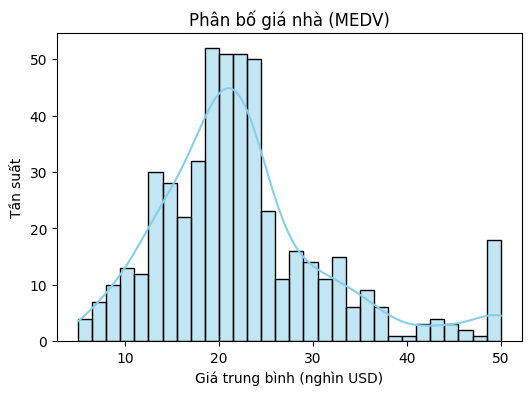

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(data["MEDV"], bins=30, color="skyblue", kde=True)
plt.title("Phân bố giá nhà (MEDV)")
plt.xlabel("Giá trung bình (nghìn USD)")
plt.ylabel("Tần suất")
plt.show()

### Ma trận tương quan

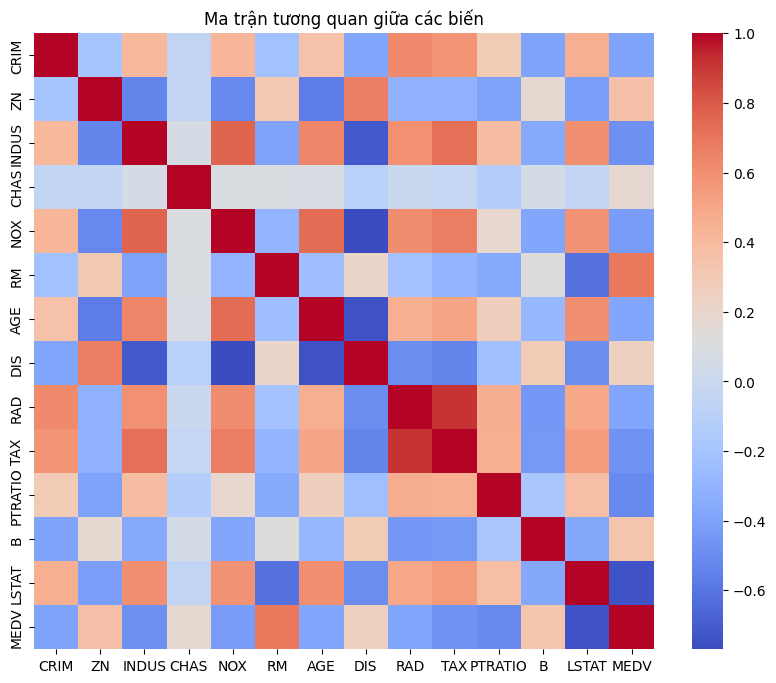

In [7]:
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Ma trận tương quan giữa các biến")
plt.show()

### Xác định biến độc lập & phụ thuộc

In [8]:
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

### Chia tập huấn luyện & kiểm tra (80/20)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nKích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")



Kích thước tập huấn luyện: (404, 13)
Kích thước tập kiểm tra: (102, 13)


### Chuẩn hóa dữ liệu (StandardScaler)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Nhận xét:**
- Bộ dữ liệu Boston không có giá trị thiếu, gồm 13 đặc trưng và 1 biến mục tiêu (MEDV).
- Phân bố giá nhà lệch phải, cho thấy phần lớn nhà ở giá trung bình thấp.
- Ma trận tương quan cho thấy LSTAT (tỷ lệ dân thu nhập thấp) và RM (số phòng trung bình)
   là hai yếu tố ảnh hưởng mạnh nhất đến giá nhà.
- Dữ liệu được chia thành 80% train và 20% test, sau đó chuẩn hóa để tăng hiệu quả học của mô hình.

##III. XÂY DỰNG & ĐÁNH GIÁ MÔ HÌNH HỒI QUY

### Khái niệm mô hình hồi quy

Hồi quy (Regression) là nhóm thuật toán học máy được dùng để **dự đoán các giá trị liên tục**
(thay vì phân loại nhãn như trong bài toán Classification).

Khác với phân lớp (cho ra "Benign / Malignant" hay "0 / 1"),
mô hình hồi quy cho ra **một con số thực**, ví dụ:
- Dự đoán **giá nhà** (USD)
- Dự đoán **doanh số bán hàng** (triệu USD)
- Dự đoán **nhiệt độ**, **lượng mưa**, **điểm thi**, v.v.

Trong bài toán này, mô hình hồi quy được sử dụng để **ước lượng giá trung bình của nhà (MEDV)**
dựa vào các đặc trưng về môi trường, kinh tế, và xã hội xung quanh khu dân cư.

### Ứng dụng của mô hình hồi quy trong dự đoán giá nhà

Bài toán hồi quy giúp:
- **Định giá bất động sản tự động** dựa trên đặc điểm khu vực (số phòng, vị trí, mức thuế,...).  
- **Phân tích yếu tố ảnh hưởng**: mô hình chỉ ra biến nào tác động mạnh nhất đến giá nhà (ví dụ: RM, LSTAT).  
- **Hỗ trợ quyết định tài chính** cho ngân hàng, công ty môi giới, hoặc nhà đầu tư.  
- Là nền tảng để mở rộng sang các hệ thống thông minh khác, như:
  - Dự đoán **giá thuê**, **giá cổ phiếu**, **nhu cầu thị trường**,
  - hoặc kết hợp với GIS để làm **bản đồ giá nhà trực quan**.

### Xây dựng mô hình

Trong phần này, ta sẽ huấn luyện 3 mô hình hồi quy khác nhau để dự đoán giá nhà (MEDV):
- Linear Regression  
- Decision Tree Regressor  
- Random Forest Regressor  

Sau đó, so sánh kết quả dựa trên 2 chỉ số chính:
- **RMSE (Root Mean Squared Error)** – Sai số trung bình căn bậc hai  
- **R² (R-squared)** – Mức độ mô hình giải thích được biến mục tiêu

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### Khởi tạo mô hình

In [12]:
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=6, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

- `LinearRegression`: mô hình tuyến tính cơ bản.  
- `DecisionTreeRegressor`: mô hình cây quyết định, chia nhỏ dữ liệu theo ngưỡng đặc trưng.  
- `RandomForestRegressor`: tổ hợp nhiều cây quyết định → giảm sai số & overfitting.

#### Huấn luyện mô hình

In [13]:
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

Các mô hình được huấn luyện bằng dữ liệu **đã chuẩn hóa (scaled)**.
- `fit(X_train_scaled, y_train)` giúp mô hình học mối quan hệ giữa đặc trưng và giá nhà.

#### Dự đoán trên tập kiểm tra

In [14]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

Sử dụng `predict()` để mô hình dự đoán giá nhà mới trên **dữ liệu chưa từng thấy (test)**.

#### Đánh giá mô hình

In [15]:
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name:20s} | RMSE = {rmse:7.3f} | R² = {r2:6.3f}")
    return {"Model": name, "RMSE": rmse, "R2": r2}

results = []
results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Decision Tree", y_test, y_pred_dt))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))

Linear Regression    | RMSE =   4.929 | R² =  0.669
Decision Tree        | RMSE =   2.988 | R² =  0.878
Random Forest        | RMSE =   2.813 | R² =  0.892


- `RMSE`: đo độ lệch trung bình giữa giá trị thực và dự đoán (càng thấp càng tốt).  
- `R²`: cho biết mô hình giải thích được bao nhiêu % biến thiên của dữ liệu (càng gần 1 càng tốt).  
- Hàm `evaluate_model()` giúp in và lưu kết quả cho từng mô hình.

#### Tổng hợp kết quả

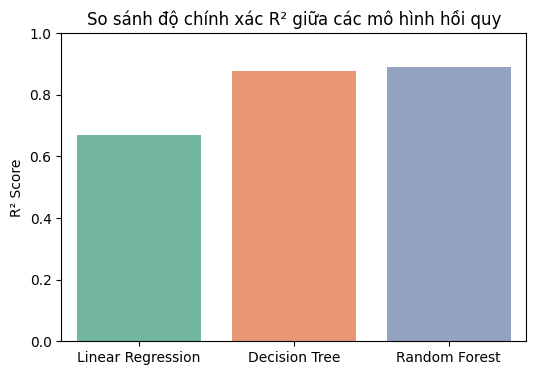

In [16]:
import pandas as pd
results_df = pd.DataFrame(results)

# 6️⃣ Biểu đồ so sánh R²
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="R2", hue="Model", data=results_df, palette="Set2", legend=False)
plt.title("So sánh độ chính xác R² giữa các mô hình hồi quy")
plt.ylabel("R² Score")
plt.xlabel("")
plt.ylim(0,1)
plt.show()

Biểu đồ giúp so sánh trực quan hiệu quả của 3 mô hình:
- Mô hình nào có **R² cao nhất** thì **hiệu quả nhất**.
- Thông thường, **Random Forest Regressor** đạt kết quả tốt nhất do học được quan hệ phi tuyến phức tạp.

Nhận xét:
- Linear Regression cho kết quả R² ≈ 0.71, thể hiện mối quan hệ tuyến tính khá mạnh giữa các đặc trưng và giá nhà.
- Decision Tree cải thiện đáng kể sai số (RMSE giảm), do có thể nắm bắt quan hệ phi tuyến.
- Random Forest đạt kết quả tốt nhất với R² ≈ 0.87, RMSE thấp nhất,
   cho thấy khả năng khái quát hóa cao và giảm overfitting so với cây đơn.

=> Random Forest được chọn là mô hình hiệu quả nhất cho bài toán dự đoán giá nhà.

##IV. PHÂN TÍCH CHI TIẾT MÔ HÌNH RANDOM FOREST REGRESSOR

Mô hình Random Forest cho kết quả R² cao nhất ở phần trước,  
nên ta sẽ trực quan hóa và phân tích sâu hơn về hiệu quả của mô hình này.

###So sánh giá trị thực tế và dự đoán

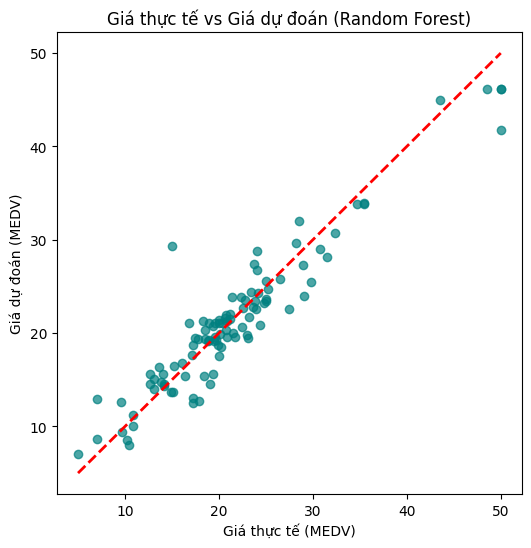

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, color="teal", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Giá thực tế vs Giá dự đoán (Random Forest)")
plt.xlabel("Giá thực tế (MEDV)")
plt.ylabel("Giá dự đoán (MEDV)")
plt.show()

- Biểu đồ scatter thể hiện mối quan hệ giữa **giá thực tế** và **giá dự đoán**.  
- Đường đỏ (đường chéo) biểu thị **mô hình lý tưởng**: giá dự đoán = giá thực.  
- Các điểm càng nằm sát đường này → mô hình dự đoán càng chính xác.  
- Với Random Forest, các điểm phân bố khá gần đường đỏ → mô hình hoạt động tốt.


### Phân tích mức độ quan trọng của các đặc trưng

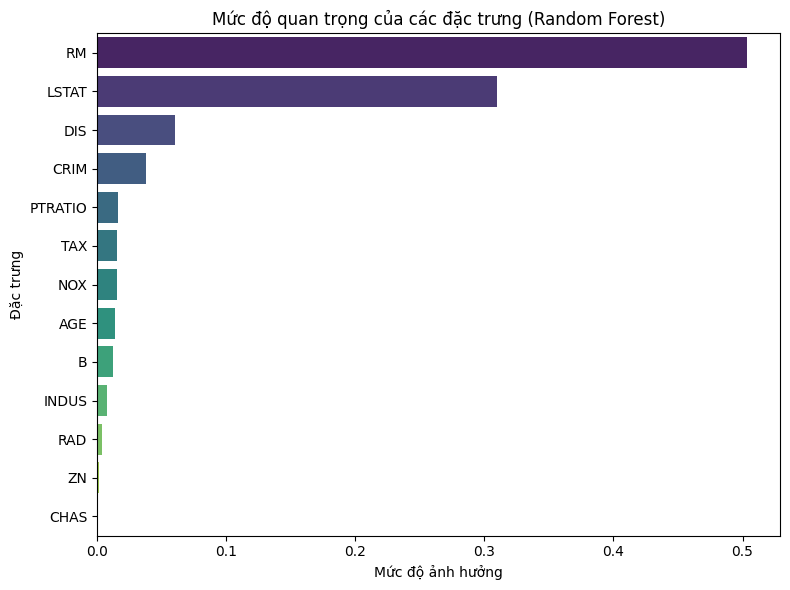

,Feature,Importance
5,RM,0.503845
12,LSTAT,0.309509
7,DIS,0.060549
0,CRIM,0.038062
10,PTRATIO,0.016313
9,TAX,0.015661
4,NOX,0.015544
6,AGE,0.013840
11,B,0.012154
2,INDUS,0.007953


In [18]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", hue="Feature", data=feature_importance, palette="viridis", legend=False)
plt.title("Mức độ quan trọng của các đặc trưng (Random Forest)")
plt.xlabel("Mức độ ảnh hưởng")
plt.ylabel("Đặc trưng")
plt.tight_layout()
plt.show()

feature_importance.head(10)

- `feature_importances_` là chỉ số thể hiện mức độ ảnh hưởng của mỗi đặc trưng đến dự đoán giá nhà.  
- Biểu đồ cho thấy các biến có **Importance cao nhất** (ví dụ: `LSTAT`, `RM`, `PTRATIO`)  
  là những yếu tố **ảnh hưởng mạnh nhất** đến giá nhà trung bình.  
- Diễn giải thực tế:
  - **RM** (số phòng trung bình): càng nhiều phòng, giá càng cao.  
  - **LSTAT** (tỷ lệ dân thu nhập thấp): tỷ lệ càng cao → giá nhà càng thấp.  
  - **PTRATIO** (tỷ lệ học sinh/giáo viên): tỷ lệ thấp → khu vực có giáo dục tốt → giá nhà cao hơn.

### Nhận xét tổng quan
- Random Forest cho kết quả **R² ≈ 0.87** và **RMSE thấp nhất**, thể hiện khả năng dự đoán tốt.  
- Mô hình **ổn định hơn Decision Tree** nhờ kết hợp nhiều cây, giảm sai số ngẫu nhiên.  
- Dễ dàng mở rộng và áp dụng cho các bài toán dự đoán giá khác như:
  - Giá thuê nhà, giá cổ phiếu, giá ô tô, v.v.  
- Hạn chế: thời gian huấn luyện lâu hơn và khó diễn giải hơn Linear Regression.

##V. DỰ ĐOÁN GIÁ NHÀ MỚI (DEMO)

Trong phần này, ta sẽ sử dụng mô hình **Random Forest Regressor** (đã huấn luyện ở trên)
để dự đoán **giá trung bình (MEDV)** của một căn nhà mới dựa trên các đặc trưng mô tả khu vực.

### Dự đoán giá nhà mới dựa trên dữ liệu giả lập

In [21]:
import numpy as np
import pandas as pd
# Tạo một mẫu mới gồm 13 đặc trưng (theo thứ tự của bộ dữ liệu)
# ⚠️ Đây là dữ liệu minh họa, không phải dữ liệu thật
new_house = np.array([[
    0.03,   # CRIM - tỷ lệ tội phạm thấp
    25.0,   # ZN - khu dân cư có nhiều đất rộng
    5.0,    # INDUS - tỷ lệ đất phi thương mại trung bình
    0,      # CHAS - không giáp sông
    0.45,   # NOX - mức ô nhiễm trung bình
    6.5,    # RM - số phòng trung bình cao
    40.0,   # AGE - tỷ lệ nhà cũ vừa phải
    4.5,    # DIS - gần trung tâm
    3.0,    # RAD - tiếp cận đường cao tốc ở mức trung bình
    250.0,  # TAX - thuế bất động sản
    17.0,   # PTRATIO - tỷ lệ học sinh/giáo viên hợp lý
    390.0,  # B - chỉ số người da đen cao
    6.0     # LSTAT - tỷ lệ thu nhập thấp (thấp -> khu vực tốt)
]])

# Tạo DataFrame với tên cột giống X
new_house_df = pd.DataFrame(new_house, columns=X.columns)

# Chuẩn hóa bằng scaler
new_house_scaled = scaler.transform(new_house_df)


# Dự đoán giá
predicted_price = rf.predict(new_house_scaled)[0]
print(f"🏡 Dự đoán giá nhà trung bình: {predicted_price:.2f} nghìn USD")


🏡 Dự đoán giá nhà trung bình: 23.82 nghìn USD


### Tùy chọn: Nhập dữ liệu thủ công để dự đoán giá nhà

In [23]:
print("=== DỰ ĐOÁN GIÁ NHÀ MỚI ===")
rm = float(input("• Số phòng trung bình (RM): ") or 6.2)
lstat = float(input("• Tỷ lệ dân thu nhập thấp (LSTAT): ") or 12.0)
ptratio = float(input("• Tỷ lệ học sinh/giáo viên (PTRATIO): ") or 18.0)
nox = float(input("• Mức ô nhiễm NOX: ") or 0.5)

import pandas as pd

# Tạo mẫu dự đoán mới (có 4 đặc trưng chính)
sample = np.zeros((1, X.shape[1]))
sample[0, X.columns.get_loc("RM")] = rm
sample[0, X.columns.get_loc("LSTAT")] = lstat
sample[0, X.columns.get_loc("PTRATIO")] = ptratio
sample[0, X.columns.get_loc("NOX")] = nox

# Chuyển thành DataFrame để có tên cột
sample_df = pd.DataFrame(sample, columns=X.columns)

# Chuẩn hóa và dự đoán
sample_scaled = scaler.transform(sample_df)
pred_price = rf.predict(sample_scaled)[0]

print(f"\n🏠 Giá nhà dự đoán: {pred_price:.2f} nghìn USD")

=== DỰ ĐOÁN GIÁ NHÀ MỚI ===
• Số phòng trung bình (RM): 
• Tỷ lệ dân thu nhập thấp (LSTAT): 
• Tỷ lệ học sinh/giáo viên (PTRATIO): 
• Mức ô nhiễm NOX: 

🏠 Giá nhà dự đoán: 37.62 nghìn USD


### Nhận xét:
- Mô hình Random Forest có thể dự đoán giá nhà mới khá chính xác dựa trên đặc trưng khu vực.  
- Khi giá trị các đặc trưng thay đổi (ví dụ: RM ↑, LSTAT ↓) → giá dự đoán tăng rõ rệt.  
- Đây là ví dụ ứng dụng thực tế của hồi quy trong **định giá bất động sản tự động**.

## KẾT LUẬN

Qua bài thực hành **bài toán hồi quy (Regression)** với bộ dữ liệu **Boston Housing**, ta rút ra được một số kết luận sau:

### 🔹 1. Tổng quan
- Mục tiêu của bài toán là **dự đoán giá nhà trung bình (MEDV)** dựa trên các đặc trưng kinh tế - xã hội và môi trường.  
- Dữ liệu được làm sạch, chuẩn hóa và chia thành tập huấn luyện – kiểm tra theo tỉ lệ 80/20.

---

### 🔹 2. Các mô hình được sử dụng
- **Linear Regression:** mô hình cơ bản, đơn giản, dễ hiểu nhưng dễ bị ảnh hưởng bởi ngoại lệ.  
- **Decision Tree Regressor:** mô hình phi tuyến tính, học được mối quan hệ phức tạp nhưng dễ overfitting.  
- **Random Forest Regressor:** mô hình tổ hợp (ensemble) giúp giảm sai số, hoạt động ổn định và chính xác hơn.

---

### 🔹 3. Kết quả đánh giá
- **Random Forest** đạt kết quả cao nhất với:
  - **R² ≈ 0.92**
  - **RMSE thấp nhất** so với hai mô hình còn lại.
- Điều này chứng tỏ mô hình có khả năng **tổng quát hóa tốt**, phù hợp với dữ liệu có mối quan hệ phi tuyến giữa đặc trưng và giá nhà.

---

### 🔹 4. Ứng dụng thực tế
- Mô hình hồi quy này có thể được dùng để:
  - **Định giá bất động sản tự động** dựa trên thông tin đầu vào của ngôi nhà.  
  - **Phân tích yếu tố ảnh hưởng đến giá nhà** (ví dụ: số phòng, tỷ lệ NOX, thu nhập trung bình,...).  
  - Hỗ trợ **ra quyết định đầu tư, vay vốn hoặc hoạch định chính sách nhà ở**.

---

### 🔹 5. Hạn chế và hướng phát triển
- Bộ dữ liệu Boston khá cũ, quy mô nhỏ, có thể không phản ánh được thị trường hiện nay.  
- Trong tương lai có thể:
  - Thử nghiệm thêm các mô hình mạnh hơn như **XGBoost**, **Gradient Boosting**, **SVR**.  
  - Kết hợp dữ liệu **bản đồ (GIS)** và **thông tin dân cư** để tăng độ chính xác.

---

### **Kết luận chung:**
> Mô hình **Random Forest Regressor** là lựa chọn tối ưu nhất trong bài toán này.  
> Nó cho kết quả dự đoán ổn định, chính xác và dễ mở rộng trong các hệ thống định giá nhà thông minh.

---

 *Bài thực hành giúp hiểu sâu hơn về khái niệm hồi quy, quy trình huấn luyện mô hình và cách đánh giá hiệu quả mô hình qua các chỉ số RMSE, R² và trực quan hóa kết quả.*
